<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/1%EC%A3%BC%EC%B0%A8/ML_week4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 자료의 실수화

In [3]:
x=[{'city':'seoul', 'temp': 10.0},{'city':'Dubai', 'temp': 31.5},{'city':'LA', 'temp': 20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 31.5},
 {'city': 'LA', 'temp': 20.0}]

In [4]:
#x를 범주형 수량화
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)
vec.fit_transform(x)

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 31.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [5]:
vecl = DictVectorizer(sparse=True)
xl = vecl.fit_transform(x)
xl

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [6]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer() 
t= vec2.fit_transform(text).toarray()

In [8]:
import pandas as pd
tl=pd.DataFrame(t, columns=vec2.get_feature_names())
tl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray()
#높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


In [10]:
import numpy as np

x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [11]:
from sklearn.impute import SimpleImputer

im=SimpleImputer(strategy='mean')
im.fit_transform(x_miss)

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [14]:
import pandas as pd

df1=pd.read_csv("train.csv")
print(df1.shape)
type(df1)

(55813, 9)


pandas.core.frame.DataFrame

In [15]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0


In [18]:
df2=pd.read_csv("store.csv",engine='python')

In [17]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
df = pd.merge(df1,df2, on='Store')
df.shape

(55813, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55813 entries, 0 to 55812
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      55813 non-null  int64  
 1   DayOfWeek                  55813 non-null  int64  
 2   Date                       55813 non-null  object 
 3   Sales                      55813 non-null  int64  
 4   Customers                  55813 non-null  int64  
 5   Open                       55813 non-null  int64  
 6   Promo                      55813 non-null  int64  
 7   StateHoliday               55812 non-null  float64
 8   SchoolHoliday              55812 non-null  float64
 9   StoreType                  55813 non-null  object 
 10  Assortment                 55813 non-null  object 
 11  CompetitionDistance        55663 non-null  float64
 12  CompetitionOpenSinceMonth  38100 non-null  float64
 13  CompetitionOpenSinceYear   38100 non-null  flo

In [21]:
print(len(df['Store'].unique()))
print(len(df['Date']))
print(df['DayOfWeek'].value_counts())

1115
55813
5    8920
4    7868
7    7805
6    7805
3    7805
2    7805
1    7805
Name: DayOfWeek, dtype: int64


In [23]:
#비대칭 데이터 문제 해결

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)


print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


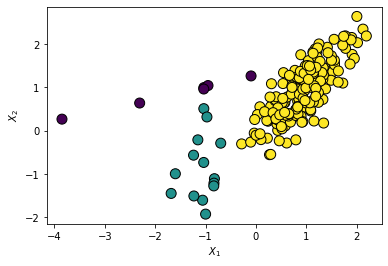

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [25]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


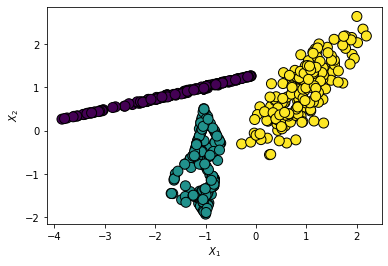

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$") 
plt.ylabel("$X_2$") 
plt.show()

In [27]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


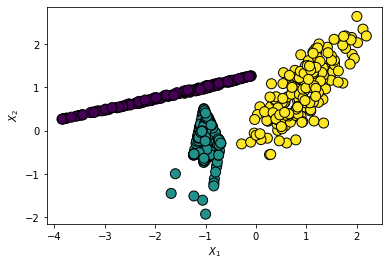

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [31]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors_ver3=3)
X_Under, y_Under = undersample.fit_resample(X, y)

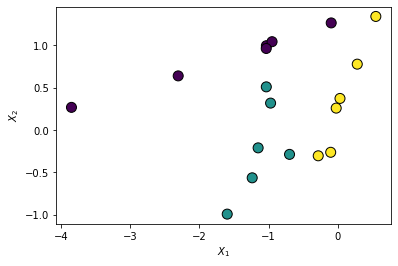

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()